# Numerical Methods in Physics and Astrophysics (2024/25) - Exercises

## Name: Andres Guarin
## Enrollment Number: 6748917

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.3 Fractals through Newton-Raphson

1. Consider first the solution to the function
\begin{equation}
f(z) = z^3 - 1 = 0
\end{equation}

In [2]:
f = lambda z : z**3-1
df = lambda z : 3*z**2

- Learn how to handle complex numbers in your language of choice.

*Solution:*

In Python, imaginary numbers can be used by appending the letter `j` to a number, for example:

In [3]:
type(1+0.5j)

complex

- Write a function ´solve_cnewton´ which takes an initial guess and returns the root (if any), the number of iterations need to converge, and the quality of the solution $f(z)$.

*Solution:*

In [4]:
def solve_cnewton(f, df, z0, tol=1e-9, max_iter=200, print_output=True):
    """
    Newton's method for root finding in the complex plane.

    Parameters:
    f: (function) function whose roots we want to find.
    df: (function) derivative of f.
    z0: (complex) initial estimate of the root.
    tol: (float) accepted tolerance.
    max_iter: (int) maximum number of iterations to be considered.
    print_output: (bool) by default, print the results to standard output.

    Returns:
    (zi, i, quality_f) (tuple)
    zi: (complex) the value obtained for the root of f.
    i: number of iterations needed to converge.
    quality_f: value of |f(z)|.
    """
    i = 0
    zi = z0
    error = np.nan
    while True:
        fi = f(zi)
        quality_f = abs(fi)
        if print_output:
            print(f"Iter {i}: z={zi}, |f(z)|={quality_f}, error={error}")
        if error < tol:
            if print_output:
                print("Error tolerance attained. Process finished successfully.")
            return (zi, i, quality_f)
        elif quality_f < tol:
            if print_output:
                print("Tolerance in |f(z)| attained. Process finished successfully.")
            return (zi, i, quality_f)
        elif i >= max_iter:
            if print_output:
                print(f"Root not found after {max_iter} iterations.")
            # raise ValueError(f"Root not found after {max_iter} iterations.")
            return (np.nan, np.inf, np.nan)
        else:
            i += 1
            dfi = df(zi)
            if (abs(dfi) < tol):
                if print_output:
                    print(f"Derivative is smaller than the allowed tolerance in iteration {i}.")
                # raise ValueError(f"Derivative is smaller than the allowed tolerance in iteration {i}.")
                return (np.nan, np.nan, np.nan)
            zprev = zi
            zi = zi - fi/dfi
            error = abs(zi-zprev)

- Write a program that takes a square $N \times N$ grid in the complex plane and, for each point, uses the above functions to find a root to which the method converges. For a convergence criteria, look for when the change in $z$ is less than $\epsilon$ with a certain number of maximum steps $M$ . That is when within $M$ steps $|z_{n+1} − z_n| < \epsilon$. Start with $M = 200$, $\epsilon=10^{−9}$ , and $N = 400$. Define the range of the grid by two gridpoint coordinates (e.g. upper left and lower right). If you know how, take these points as arguments to the main function to ease exploring a given function; otherwise hardcode them initially at $|x_0| < 2$ and $|y_0| < 2$.

*Solution:*

In [5]:
def solve_grid_cnewton(f, df, upperleftpoint=-2+2j, lowerrightpoint=2-2j, N=400, M=200, e=1e-9, save_file=''):
    """
    Newton's method for root finding in a grid in the complex plane.

    Parameters:
    f: (function) function whose roots we want to find.
    df: (function) derivative of f.
    upperleftpoint: (complex) upper left point defining the range of the grid.
    lowerrigntpoint: (complex) lower right point defining the range of the grid.
    N: (int) number of points in each axis of the grid.
    M: (int) maximum number of steps to be considered.
    e: (float) accepted tolerance.
    save_file: (string) if not the empty string, it specifies the name of the file to save the result data.

    Returns:
    pd.DataFrame
        pandas DataFrame containing the data in the format
            x0  y0  k(z)  f(z)  log10(niter)
    """
    x = np.linspace(upperleftpoint.real, lowerrightpoint.real, N)
    y = np.linspace(lowerrightpoint.imag, upperleftpoint.imag, N)
    result = []
    for x0 in x:            
        for y0 in y:
            z0 = x0 + 1j*y0
            pointsolution = solve_cnewton(f, df, z0, tol=e, max_iter=M, print_output=False)
            result.append([x0, y0, pointsolution[0], f(z0), np.log10(pointsolution[1])])
    result = pd.DataFrame(result, columns=['x0', 'y0', 'k(z)', 'f(z)', 'log10(niter)'])
    if save_file != '':
        result.to_csv(save_file, index=False)
    return result

- Have the main program print out or save, for every point $z_0$ of your $n \times N$ grid, a line of format
\begin{equation}
x_0 \qquad y_0 \qquad k(z) \qquad f(z) \qquad \log_{10}(n_{itns})
\end{equation}
with one blank line after each row of the matrix (if you are working in C in linux). Here
$k(z)$ is either the complex root to which the method converges, or zero. $n_{itns}$ is the number of iterations taken to converge, if it does.

*Solution:*

The desired features are implemented in the previous function `solve_grid_cnewton`, which has as output a pandas DataFrame with each of the required columns:

In [6]:
result = solve_grid_cnewton(f, df)
result

,x0,y0,k(z),f(z),log10(niter)
0,-2.0,-2.000000,-0.500000-0.866025j,15.000000-16.000000j,0.845098
1,-2.0,-1.989975,-0.500000-0.866025j,14.760002-15.999398j,0.845098
2,-2.0,-1.979950,-0.500000-0.866025j,14.521209-15.997596j,0.845098
3,-2.0,-1.969925,-0.500000-0.866025j,14.283623-15.994600j,0.845098
4,-2.0,-1.959900,-0.500000-0.866025j,14.047242-15.990416j,0.845098
...,...,...,...,...,...
159995,2.0,1.959900,1.000000+0.000000j,-16.047242+15.990416j,0.954243
159996,2.0,1.969925,1.000000+0.000000j,-16.283623+15.994600j,0.954243
159997,2.0,1.979950,1.000000-0.000000j,-16.521209+15.997596j,0.954243
159998,2.0,1.989975,1.000000-0.000000j,-16.760002+15.999398j,0.954243


- Plot $\Im(k(z))$ on the $(x,y)$ plane with a colorscaling in map mode. Find an interesting region and look at it closer. Repeat. Choose an interesting region and save the plot.

*Solution:*

In [7]:
def plot_imag_k(data, save_fig=''):
    imag_k = data.pivot(index='y0', columns='x0', values='k(z)').values.imag
    xmin = data['x0'].min()
    xmax = data['x0'].max()
    ymin = data['y0'].min()
    ymax = data['y0'].max()
    plt.figure()
    plt.imshow(imag_k, extent=(xmin, xmax, ymin, ymax), origin='lower')
    plt.colorbar(label=r'$\Im(k(z))$')
    if save_fig != '':
        plt.savefig(save_fig)

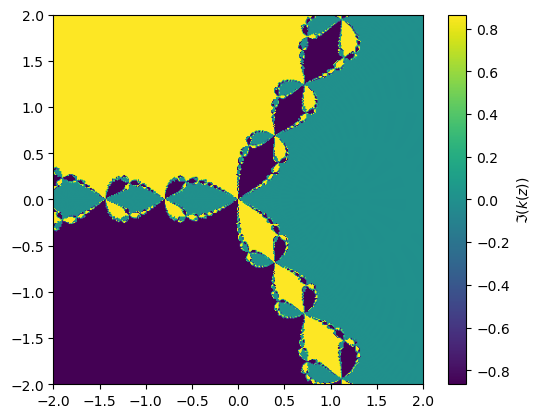

In [8]:
plot_imag_k(result)

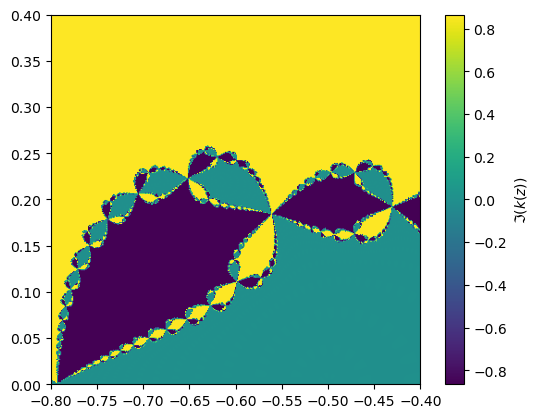

In [9]:
plot_imag_k(solve_grid_cnewton(f, df, upperleftpoint=-0.8+0.4j, lowerrightpoint=-0.4))

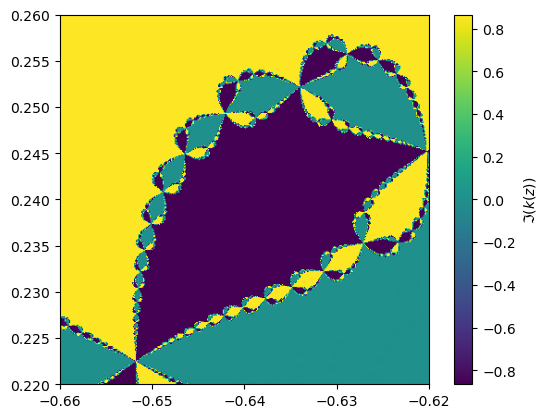

In [10]:
plot_imag_k(solve_grid_cnewton(f, df, upperleftpoint=-0.66+0.26j, lowerrightpoint=-0.62+0.22j), save_fig='imag_k_1.png')

- Plot $\log_(n_{itns})$ in the $(x,y)$ plane, focusing around a region where the solver does not converge. Comment on what you see.

*Solution:*

In [11]:
def plot_log10_niter(data, save_fig=''):
    log_niter = data.pivot(index='y0', columns='x0', values='log10(niter)').values
    xmin = data['x0'].min()
    xmax = data['x0'].max()
    ymin = data['y0'].min()
    ymax = data['y0'].max()
    plt.figure()
    plt.imshow(log_niter, extent=(xmin, xmax, ymin, ymax), origin='lower')
    plt.colorbar(label=r'$\log_{10}(n_{iter})$')
    if save_fig != '':
        plt.savefig(save_fig)
    return

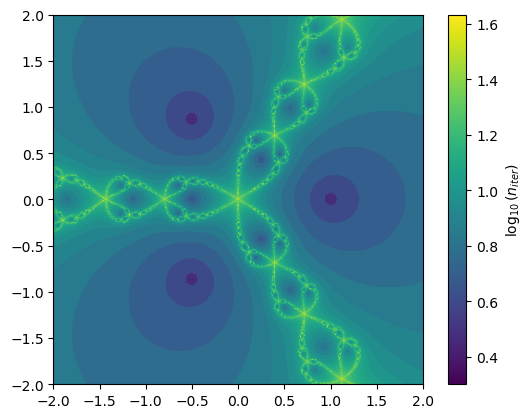

In [12]:
plot_log10_niter(result)

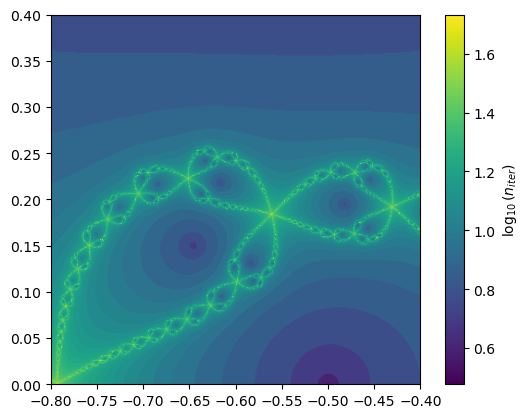

In [13]:
plot_log10_niter(solve_grid_cnewton(f, df, upperleftpoint=-0.8+0.4j, lowerrightpoint=-0.4))

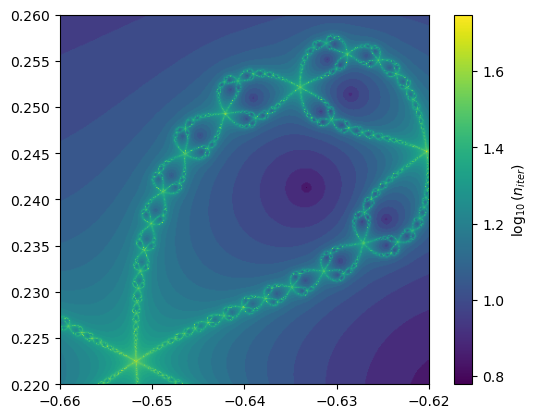

In [14]:
plot_log10_niter(solve_grid_cnewton(f, df, upperleftpoint=-0.66+0.26j, lowerrightpoint=-0.62+0.22j), save_fig='log10_niter_1.png')

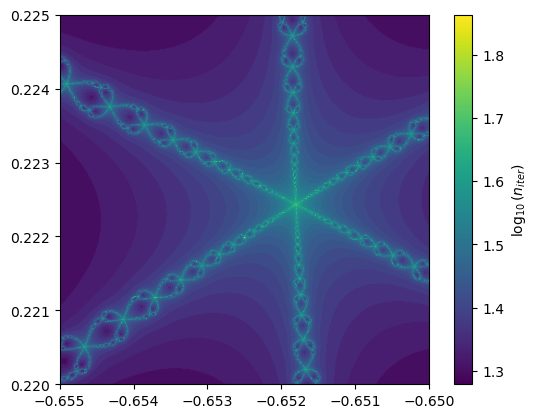

In [15]:
plot_log10_niter(solve_grid_cnewton(f, df, upperleftpoint=-0.655+0.225j, lowerrightpoint=-0.65+0.22j))

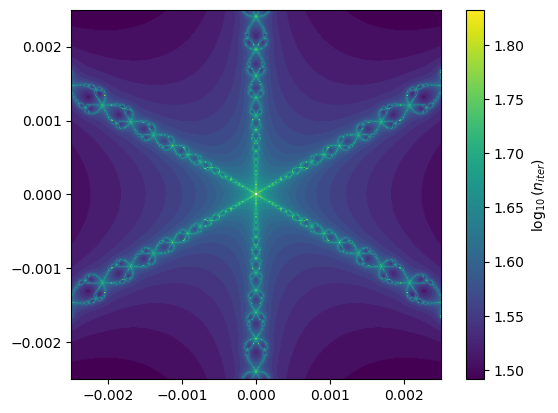

In [16]:
plot_log10_niter(solve_grid_cnewton(f, df, upperleftpoint=-0.0025+0.0025j, lowerrightpoint=0.0025-0.0025j))

The solver takes long to converge in the region shown in the previous picture (the origin). This might be because around this point the derivative is close to zero. It seems to alsooccur on those points for which a small movement would make the convergence to happen to different roots. Moreover, no matter how much we zoom in, the same patterns arise again and again, showing evidence of the fractal nature of this process.

2. Look at the website http://www.chiark.greenend.org.uk/~sgtatham/newton/ and use your basic code with different functions to explore and understand the convergence and sensitivities of Newton-Raphson. Consider particularly solutions to the function
\begin{equation}
f(z) = 35z^9 - 180z^7 + 378z^5 - 420z^3 + 315z
\end{equation}

In [17]:
f2 = lambda z : 35*z**9 - 180*z**7 + 378*z**5 - 420*z**3 + 315*z
df2 = lambda z : 315*z**8 - 1260*z**6 + 1890*z**4 - 1260*z**2 + 315

*Solution:*

We use our previous code on the specified function:

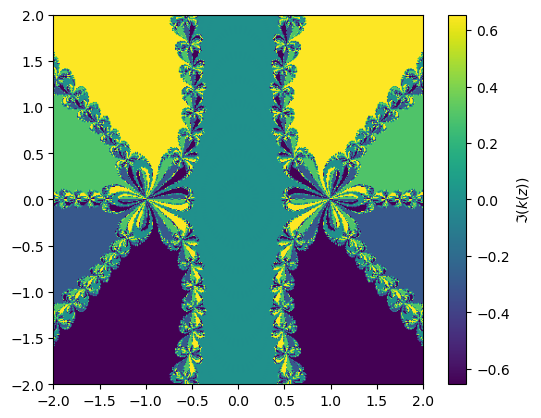

In [18]:
result_f2 = solve_grid_cnewton(f2, df2)
plot_imag_k(result_f2)

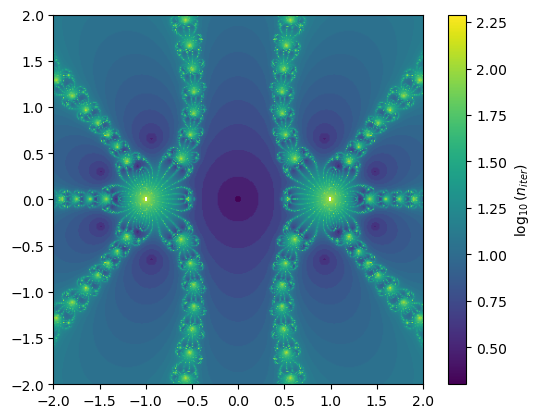

In [19]:
plot_log10_niter(result_f2)

We again see the beautiful fractal nature arising from this root finding method. We also note how the number of iterations needed is small for initial guesses that are close to the nine roots, and how it goes high the closer we get to the points for which the derivative of the function is zero, that is, the points $z=1$ and $z=-1$. This efect might be amplified by the fact that those points correspond to roots of multiplicity 4 of the derivative of the function considered.

On the following we look closer on a region around $z=-1$, and marvel with the beauty of the structures arising.

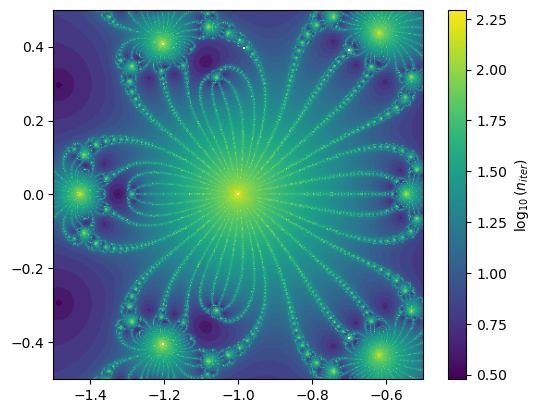

In [20]:
plot_log10_niter(solve_grid_cnewton(f2, df2, upperleftpoint=-1.5+0.5j, lowerrightpoint=-0.5-0.5j), save_fig='log10_niter_1.png')